In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='darkgrid', palette="pastel")

import warnings
warnings.filterwarnings("ignore")

##### Part I. lineplot
###### seaborn gallary : https://seaborn.pydata.org/examples/errorband_lineplots.html

In [2]:
fmri = sns.load_dataset("fmri")
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
subject      1064 non-null object
timepoint    1064 non-null int64
event        1064 non-null object
region       1064 non-null object
signal       1064 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [3]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


[Text(0.5, 1.0, 'by Subject')]

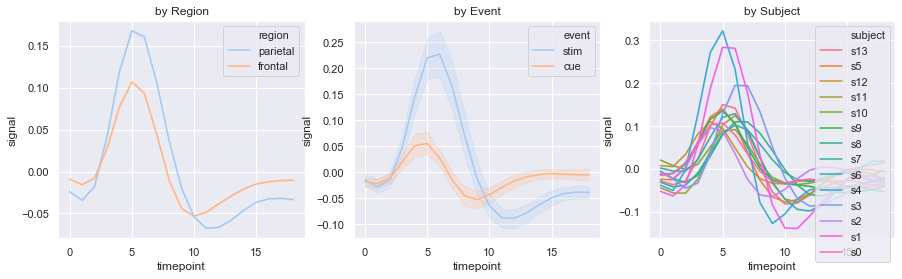

In [4]:
figure, ((ax1,ax2,ax3)) = plt.subplots(ncols=3)
figure.set_size_inches(15,4)

sns.lineplot(data=fmri, x='timepoint', y='signal', hue='region', ci=0, ax=ax1)
sns.lineplot(data=fmri, x='timepoint', y='signal', hue='event', ci=95, ax=ax2)
sns.lineplot(data=fmri, x='timepoint', y='signal', hue='subject', ci=0, ax=ax3)
ax1.set(title='by Region')
ax2.set(title='by Event')
ax3.set(title='by Subject')

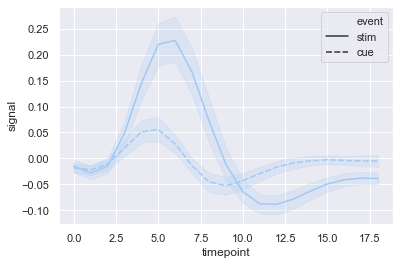

In [5]:
## hue 대신 style을 지정하면 선의 모양이 다르게 표시된다. 
sns.lineplot(data=fmri, x='timepoint', y='signal', style='event')

##### Part II. lineplot으로 장기간의 데이터 표현하기
###### seaborn gallary : https://seaborn.pydata.org/examples/wide_data_lineplot.html

In [6]:
#### date_range 명령어를 사용하여, 시간축(x축)을 구성할 dates를 만든다. 
#### 2016-1-1로 부터, 365 Day를 만든다. 
dates = pd.date_range("1 1 2016", periods=365, freq="D")

In [7]:
#### 값(value)를 365x4개 만들고, 이것을 가로(axis=0)방향으로 누적합을 구한다. 
values = np.random.randn(365, 4).cumsum(axis=0)

In [8]:
#### x, y가 정의된 데이터셋을 구성한다. 
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])

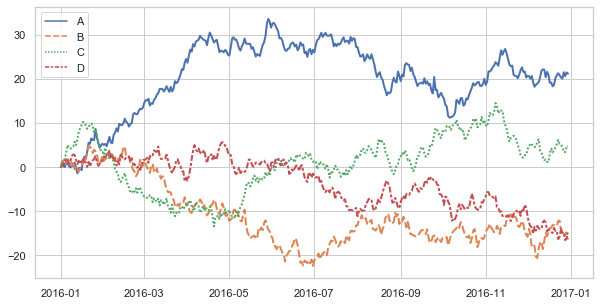

In [9]:
#### 데이터 프레임으로부터 차트를 만든다. 
sns.set(style='whitegrid')
plt.figure(figsize=(10, 5)) 

sns.lineplot(data=data, linewidth=2)   ### linewidth 옵션으로 선 굵기를 지정 

##### Part III. scatterplot
###### seaborn gallary : https://seaborn.pydata.org/examples/different_scatter_variables.html

In [10]:
diamonds = sns.load_dataset("diamonds")
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [11]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##### meannig of columns 
###### carat weight of the diamond : 0.2 ~ 5.01
###### cut quality of the cut : Fair, Good, Very Good, Premium, Ideal
###### color diamond colour : J (worst) ~ D (best)
###### clarity a measurement of how clear the diamond : I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)
###### depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
###### table width of top of diamond relative to widest point : 43 ~ 95
###### price price in US dollars : 326 ~ 18,823 $
###### x length in mm : 0 ~ 10.74
###### y width in mm : 0 ~ 58.9
###### z depth in mm : 0 ~ 31.8

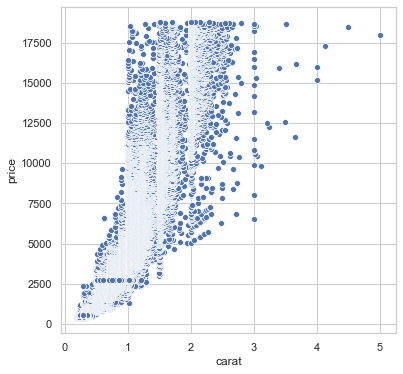

In [12]:
plt.figure(figsize=(6,6)) 
sns.scatterplot(data=diamonds, x='carat', y='price')

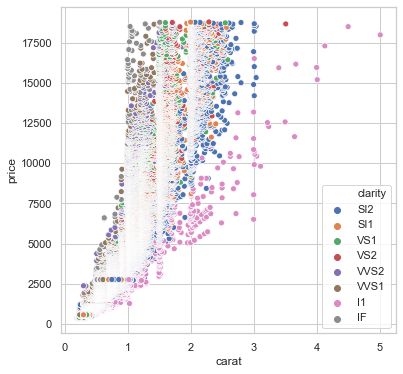

In [13]:
plt.figure(figsize=(6,6)) 
sns.scatterplot(data=diamonds, x='carat', y='price', hue='clarity')

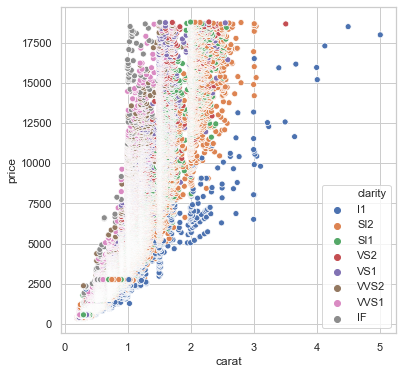

In [14]:
#### hue 옵션을 지정해도 잘 구별되지 않으므로 ... 
#### 투명도 랭킹을 정의하고, 랭킹에 따라 정렬한 후, hue_order 옵션을 사용한다.
#### 투명도 랭킹이 높을 수록, 캐럿이 적어도 가격은 높게 형성되고 있음을 알수 있다. 
plt.figure(figsize=(6,6)) 
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(data=diamonds, x='carat', y='price', hue='clarity', hue_order = clarity_ranking)

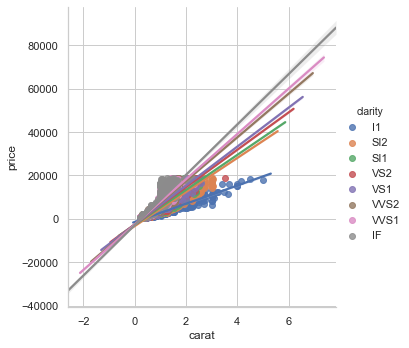

In [15]:
#### lmplot도 sctterplot과 유사하나 회귀선을 그려주는 것이 차이점 
sns.lmplot(data=diamonds, x='carat', y='price', hue='clarity', hue_order = clarity_ranking)

##### Part IV. scatter plot and correlation 
###### seaborn gallary : https://seaborn.pydata.org/examples/scatterplot_sizes.html

In [16]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [17]:
planets['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

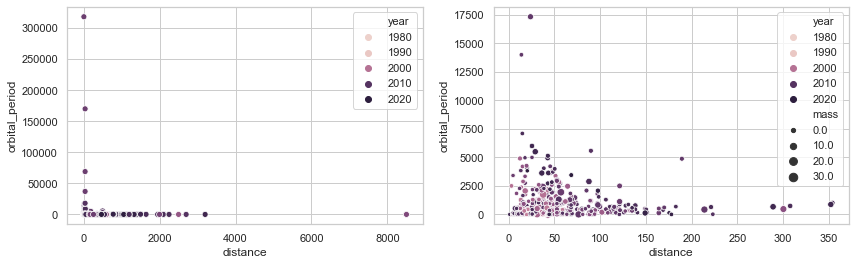

In [18]:
figure, (ax1,ax2) = plt.subplots(ncols=2)
figure.set_size_inches(14,4)

sns.scatterplot(data=planets, x="distance", y="orbital_period", 
                hue="year", ax=ax1)
sns.scatterplot(data=planets, x="distance", y="orbital_period", 
                hue="year", size='mass', ax=ax2)       ## size 옵션을 사용하여 mass에 따라 크기를 다르게 표시 

In [19]:
#### outlier를 확인해 보자 
print(planets[planets['distance'] > 8000])
print('-------------------------------------------------------------')
print(planets[planets['orbital_period'] > 150000])

      method  number  orbital_period  mass  distance  year
951  Transit       1           4.200   NaN    8500.0  2006
952  Transit       1           1.796   NaN    8500.0  2006
-------------------------------------------------------------
      method  number  orbital_period  mass  distance  year
68   Imaging       1        318280.0   NaN      7.69  2008
643  Imaging       4        170000.0   NaN     39.94  2008
937  Imaging       1        730000.0   NaN       NaN  2006


##### --> outlier들은 mass값이 결측치, 때문에 위에서 size='mass'옵션을 주었을때 결측치는 제외되었었다. 

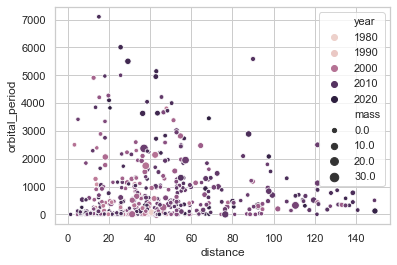

In [20]:
#### 데이터 범위를 제한하여, 다시 산점도 작성  
planets_zoom = planets[(planets['distance'] < 150) 
                       & (planets['orbital_period']<7500)] 

sns.scatterplot(data=planets_zoom, x="distance", y="orbital_period", hue="year", size='mass')

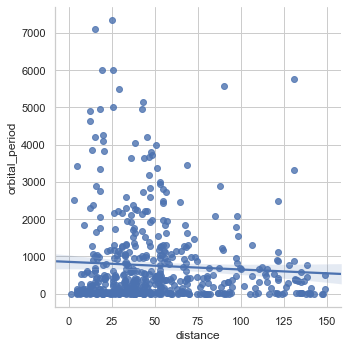

In [21]:
#### lmplot으로 회귀선 포함 그리기 
sns.lmplot(data=planets_zoom, x="distance", y="orbital_period")

In [22]:
#### 두 변수간의 corr을 구해보자 
planets[['distance','orbital_period']].corr()

,distance,orbital_period
distance,1.000000,-0.034365
orbital_period,-0.034365,1.000000


##### Part V. 회귀선의 잔차(residuals) 
###### seaborn gallary : https://seaborn.pydata.org/examples/residplot.html

In [23]:
## 평균 2, 표준편차 1인 정규분포로부터 75개의 난수 생성 
x = np.random.normal(2, 1, 75)
x

array([ 1.85313898,  2.40897046,  1.69407005,  1.82879369,  1.87528755,
        1.45399264,  1.63172682,  3.75830926,  3.03998035,  3.79325107,
        0.91878667,  3.36996003,  1.39657988,  2.4317225 ,  2.81406212,
        0.45465719,  0.58479817,  1.32658942,  0.39798873,  2.71287569,
        2.86582631,  2.89635066,  3.73545972,  3.07451904,  2.5165255 ,
        3.76166179,  3.76197103,  5.39448163,  2.41251446,  0.63131716,
        2.27507233,  3.13261204,  0.73987411,  2.55674109,  0.6947761 ,
        1.03412032,  4.45840445,  2.72246112,  0.65009879,  2.82665152,
        2.31007914,  2.50127395, -0.46816268,  2.73592075,  2.36584464,
        0.62859219,  2.57010882,  1.44997871,  2.31036533,  3.23325668,
        2.31325928,  1.66243677, -0.52749822,  1.15864099,  1.8122932 ,
        3.84589039, -0.19494665,  2.29933474,  2.76130033,  1.68668782,
        2.25941377,  2.0583742 ,  2.44981887,  2.21190942,  2.139958  ,
        1.92646698,  0.55975624,  5.01218141,  2.54362922,  0.22

In [25]:
y = 2 + 1.5*x + np.random.normal(0, 2, 75)

[Text(0.5, 1.0, 'residplot(lowess=True)')]

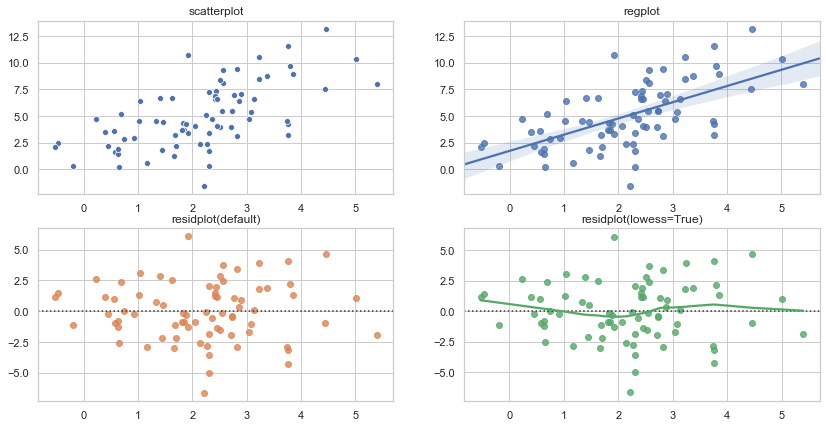

In [31]:
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(14,7)

sns.scatterplot(x=x, y=y, ax=ax1)
sns.regplot(x=x, y=y, ax=ax2)                   #### scatterplot에 회귀선을 추가 
sns.residplot(x=x, y=y, ax=ax3)                 #### 잔차를 표시 
sns.residplot(x=x, y=y, lowess=True, ax=ax4)    #### 잔차에 평활곡선을 추가 

ax1.set(title = 'scatterplot')
ax2.set(title = 'regplot')
ax3.set(title = 'residplot(default)')
ax4.set(title = 'residplot(lowess=True)')

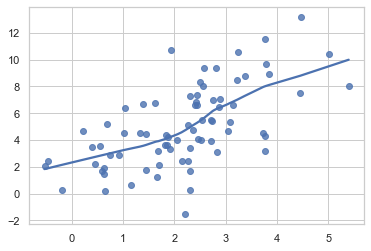

In [34]:
## regplot에서도 lowess 옵션을 사용할 수 있다. (회귀직선을 생략하고 평활곡선을 출력해 준다.)
sns.regplot(x=x, y=y, lowess=True)